In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
animetable = pd.read_csv('anime.csv')

list(animetable)

['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members']

In [5]:
animetable.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [6]:
animetable.shape

(12294, 7)

In [7]:
animetable.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [8]:
animetable[animetable.rating.isnull()]

,anime_id,name,genre,type,episodes,rating,members
8968,34502,Inazma Delivery,"Action, Comedy, Sci-Fi",TV,10,NaN,32
9657,34309,Nananin no Ayakashi: Chimi Chimi Mouryou!! Gen...,"Comedy, Supernatural",TV,Unknown,NaN,129
10896,34096,Gintama (2017),"Action, Comedy, Historical, Parody, Samurai, S...",TV,Unknown,NaN,13383
10897,34134,One Punch Man 2,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ...",TV,Unknown,NaN,90706
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,Unknown,NaN,60999
10899,25777,Shingeki no Kyojin Season 2,"Action, Drama, Fantasy, Shounen, Super Power",TV,Unknown,NaN,170054
10900,34437,Code Geass: Fukkatsu no Lelouch,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",NaN,Unknown,NaN,22748
10901,33486,Boku no Hero Academia 2nd Season,"Action, Comedy, School, Shounen, Super Power",TV,Unknown,NaN,46892
10902,32937,Kono Subarashii Sekai ni Shukufuku wo! 2,"Adventure, Comedy, Fantasy, Magic, Supernatural",TV,Unknown,NaN,54069
10903,33506,Ao no Exorcist: Kyoto Fujouou-hen,"Action, Demons, Fantasy, Shounen, Supernatural",TV,Unknown,NaN,45127


We are removing anything without a rating. A general glance through this list, this seems to be everything without a rating hadn't aired when this dataset was created. Thus, because we will later use the ratings for ML analysis, we are throwing out these values, and saying that we are only analyzing anime from pre-2017. Ok, these don't have the years on them, but we are weebs so we can tell. trust us

In [9]:
animetable = animetable.dropna(subset=['rating'])

In [10]:
animetable.isnull().sum()

anime_id     0
name         0
genre       47
type         0
episodes     0
rating       0
members      0
dtype: int64

In [11]:
animetable[animetable.genre.isnull()]

,anime_id,name,genre,type,episodes,rating,members
2844,33242,IS: Infinite Stratos 2 - Infinite Wedding,NaN,Special,1,7.15,6604
3541,33589,ViVid Strike!,NaN,TV,12,6.96,12345
6040,29765,Metropolis (2009),NaN,Movie,1,6.27,313
6646,32695,Match Shoujo,NaN,ONA,1,6.02,242
7018,33187,Katsudou Shashin,NaN,Movie,1,5.79,607
7198,30862,Yubi wo Nusunda Onna,NaN,Movie,1,5.65,223
7335,28987,Kamakura,NaN,Movie,1,5.53,164
7349,19219,Modern No.2,NaN,Movie,1,5.52,374
7426,29629,Coffee Break,NaN,Movie,1,5.44,265
7498,28653,Maze,NaN,Movie,1,5.37,138


Throwing out the instances without genres as well. There are only a few, with generally low interest, and we still have a lot of data to consider

In [12]:
animetable = animetable.dropna(subset=['genre'])

In [13]:
#temporary measure: populate anything with unknown as 1 episode
animetable[animetable.episodes == 'Unknown']

,anime_id,name,genre,type,episodes,rating,members
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,Unknown,8.58,504862
252,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,Unknown,8.25,114702
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,Unknown,7.94,533578
991,966,Crayon Shin-chan,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",TV,Unknown,7.73,26267
1021,33157,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Special,Unknown,7.72,5400
1272,21639,Yu☆Gi☆Oh! Arc-V,"Action, Fantasy, Game, Shounen",TV,Unknown,7.61,17571
1309,8687,Doraemon (2005),"Comedy, Kids, Sci-Fi, Shounen",TV,Unknown,7.59,2980
1928,32410,Dimension W: W no Tobira Online,"Sci-Fi, Seinen",Special,Unknown,7.40,4799
1930,30694,Dragon Ball Super,"Action, Adventure, Comedy, Fantasy, Martial Ar...",TV,Unknown,7.40,111443
1993,32977,Aggressive Retsuko,"Comedy, Music",TV,Unknown,7.38,5465


In [14]:
animetable.episodes = animetable.episodes.replace(['Unknown'], 1)

In [15]:
animetable.episodes = animetable.episodes.astype(int)
animetable.rating = animetable.rating.astype(float)
animetable.members = animetable.members.astype(int)

In [16]:
animetable.genre = animetable.genre.apply(lambda x: x.split(', '))
animetable['genreCount'] = animetable.genre.apply(lambda x: len(x))

In [17]:
genre_list = list(itertools.chain.from_iterable(animetable.genre.values.flatten()))
genre = np.unique(genre_list)
genre

array(['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons',
       'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai',
       'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts',
       'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police',
       'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen',
       'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life',
       'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller',
       'Vampire', 'Yaoi', 'Yuri'], 
      dtype='<U13')

In [18]:
len(genre)

43

In [19]:
genre_count = []

for category in genre: 
    genre_count.append(genre_list.count(category))
    
dict = {'genre': genre, 'count':genre_count}
genre_df = pd.DataFrame(dict)

In [20]:
animetable.head()

,anime_id,name,genre,type,episodes,rating,members,genreCount
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1,9.37,200630,4
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",TV,64,9.26,793665,7
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51,9.25,114262,7
3,9253,Steins;Gate,"[Sci-Fi, Thriller]",TV,24,9.17,673572,2
4,9969,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51,9.16,151266,7


In [21]:
#print(animetable.iloc[587])

In [22]:
genre_df.sort_values(by = "count", ascending = False)

,count,genre
3,4575,Comedy
0,2768,Action
1,2316,Adventure
8,2242,Fantasy
28,2036,Sci-Fi
6,1977,Drama
32,1684,Shounen
15,1598,Kids
25,1437,Romance
34,1204,Slice of Life


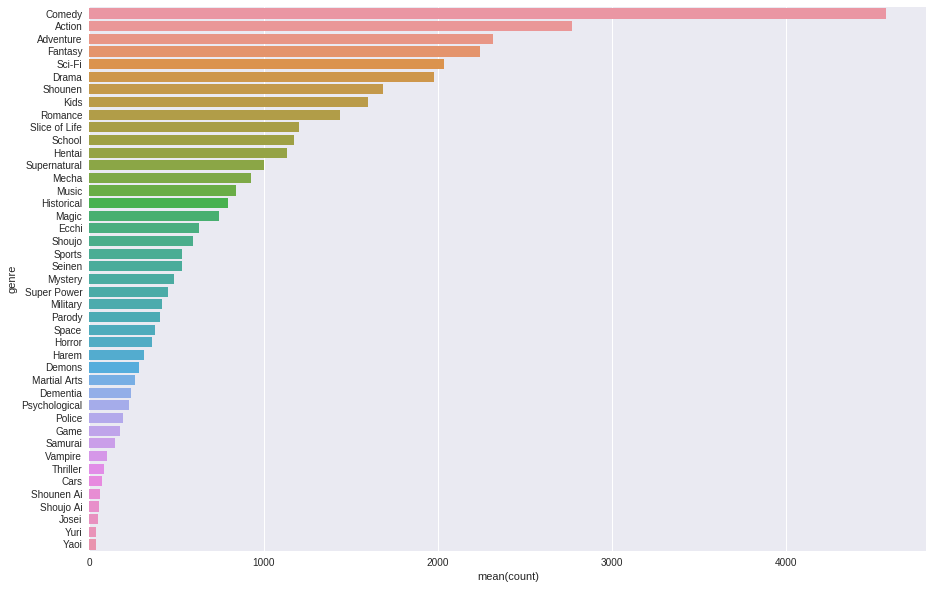

In [23]:
plt.figure(figsize=(15,10))
result = genre_df.groupby(["genre"])['count'].aggregate(np.median).reset_index().sort_values('count', ascending = False)
sns.barplot(x="count", y="genre", data=genre_df, order = result['genre'])
plt.show()

In [24]:
#list(animetable)
animetable.shape

(12017, 8)

Members vs Ratings, followed by grouping on genre?

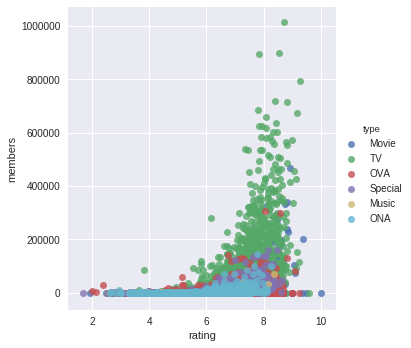

In [25]:
plt.figure(figsize=(15,10))
sns.lmplot(y = "members", x = "rating", data=animetable, hue="type", fit_reg=False)
#sns.lmplot("members", "rating", data=animetable, hue='genre', fit_reg=False)

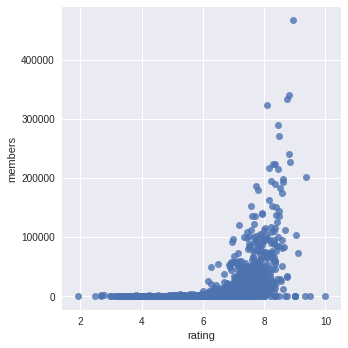

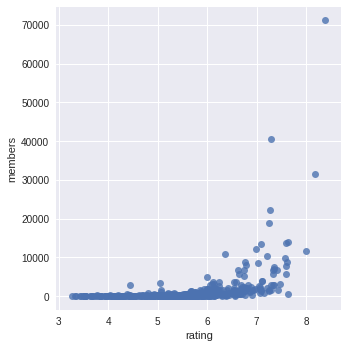

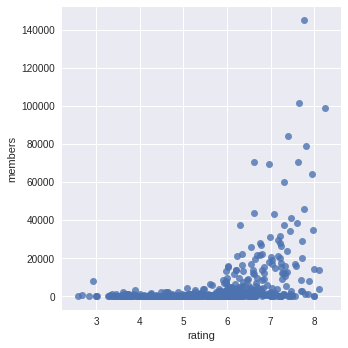

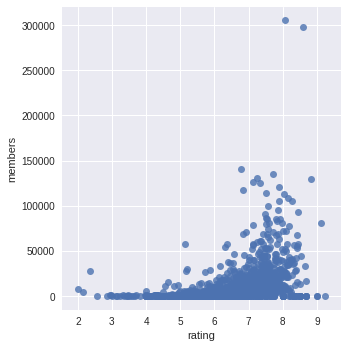

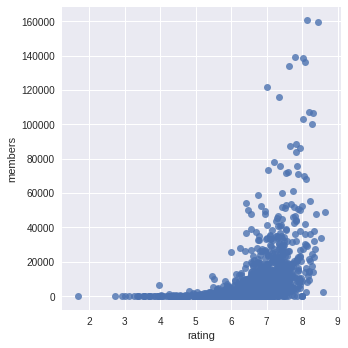

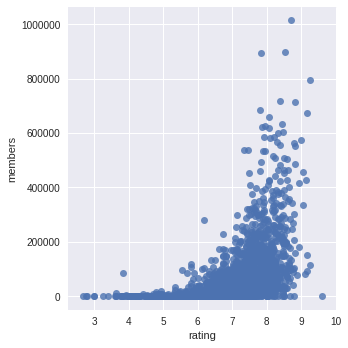

In [26]:
for title, format_type in animetable.groupby('type'): 
    sns.lmplot(y = "members", x = "rating", data=format_type, fit_reg=False)

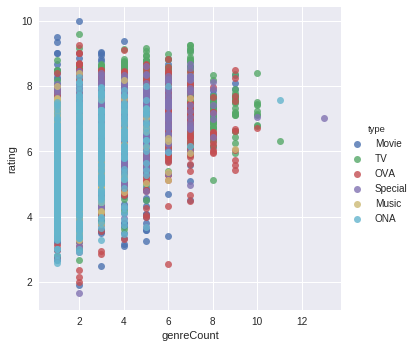

In [27]:
plt.figure(figsize=(15,10))
sns.lmplot(x = "genreCount", y = "rating", data=animetable, hue='type', fit_reg=False)

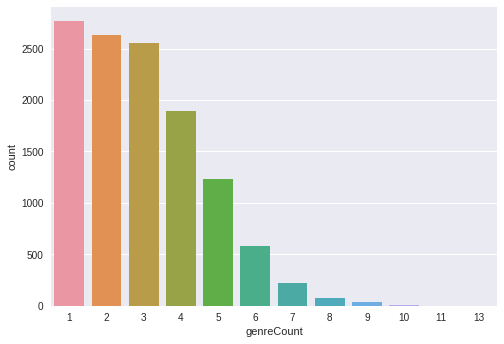

In [28]:
sns.countplot(x="genreCount", data=animetable)

In [38]:
import math

animetable['membersRange'] = animetable.members.apply(lambda a: max(0, (int(a) - (int(a) % 50000))))
animetable['membersRangeLog'] = animetable.members.apply(lambda a: int(math.log(a, 10)))

In [39]:
animetable.head()

,anime_id,name,genre,type,episodes,rating,members,genreCount,membersRange,membersRangeLog
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1,9.37,200630,4,200000,5
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",TV,64,9.26,793665,7,750000,5
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51,9.25,114262,7,100000,5
3,9253,Steins;Gate,"[Sci-Fi, Thriller]",TV,24,9.17,673572,2,650000,5
4,9969,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51,9.16,151266,7,150000,5


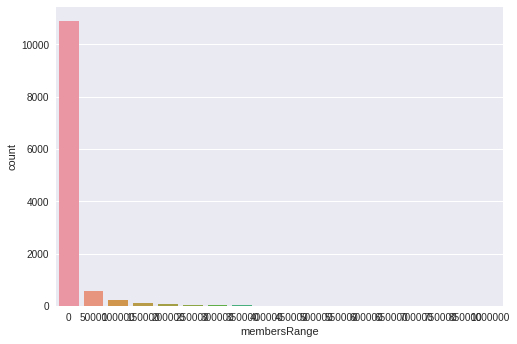

In [32]:
sns.countplot(x="membersRange", data=animetable)

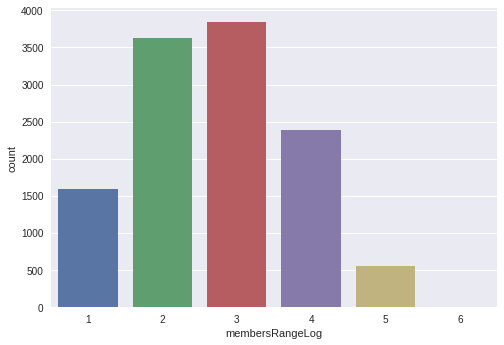

In [40]:
sns.countplot(x="membersRangeLog", data=animetable)

In [47]:
print(animetable[animetable['membersRangeLog'] == 3].sample(10).name)
print(animetable[animetable['membersRangeLog'] == 4].sample(10).name)

1669           Kuroko no Basket: Oshaberi Demo Shimasen ka
12045               Shiiku x Kanojo: Tenshi no Kousoku-hen
11219                           Uchuu Kaizoku Sara Special
11354    Mou Hasamazu ni wa Irarenai♥: Hoshi ni Onegai ...
6284                           Zeonic Toyota Special Movie
5324                             Happy Seven: The TV Manga
4889                           Zettai Karen Children Recap
3074                   Lupin III: Lupin vs. Fukusei-ningen
12063                                                   El
5274                                            Burn Up! W
Name: name, dtype: object
2417            Persona 5 the Animation: The Day Breakers
6308                                      Chu Feng: B.E.E
1934                                             Inukami!
4969    Active Raid: Kidou Kyoushuushitsu Dai Hachi Ga...
1118                               Haiyore! Nyaruko-san F
2595             Yoake Mae yori Ruriiro na: Crescent Love
472              Lupin III vs. Detec

In [48]:
# arbitrary, but let's set anything with more than 10000 members to be 'popular' for classification purposes
animetable['popularClass'] = animetable.membersRangeLog.apply(lambda a: int(a > 3))

In [50]:
animetable.sample(10)

,anime_id,name,genre,type,episodes,rating,members,genreCount,membersRange,membersRangeLog,popularClass
1354,7045,Doraemon Movie 21: Nobita no Taiyou Ou Densetsu,"[Adventure, Comedy, Fantasy, Historical, Kids,...",Movie,1,7.57,1970,6,0,3,0
7199,7374,100%,[Drama],OVA,1,5.64,363,1,0,2,0
4467,5529,Pokemon: Odoru Pokemon Himitsu Kichi,"[Comedy, Fantasy, Kids]",Movie,1,6.72,5846,3,0,3,0
3771,33372,Overlord: Ple Ple Pleiades (OVA),"[Action, Comedy, Fantasy, Magic]",OVA,1,6.89,15008,4,0,4,1
2471,5163,Code Geass: Hangyaku no Lelouch R2 Picture Drama,"[Comedy, Ecchi, Slice of Life]",Special,9,7.25,22926,3,0,4,1
12267,14207,Lovely Series,[Hentai],OVA,2,4.11,174,1,0,2,0
1759,17875,Papa no Iukoto wo Kikinasai! OVA,"[Comedy, Romance, Slice of Life]",OVA,2,7.45,19904,3,0,4,1
9796,32166,Obaachan no Takaramono,"[Kids, Music]",Music,1,4.50,39,2,0,1,0
2895,2993,Rosario to Vampire,"[Comedy, Ecchi, Fantasy, Harem, Romance, Schoo...",TV,13,7.14,299278,8,250000,5,1
10029,17317,Pro Golfer Saru: Super Golf World e no Chousen!!,"[Kids, Sports]",Movie,1,5.60,61,2,0,1,0


In [51]:
# lets use some classifier to figure out guess if something will be popular or not!

In [52]:
for category in genre: 
    animetable[category] = animetable.genre.apply(lambda x: int(category in x))

animetable = animetable.drop(['genre'], axis = 1)

format_type = np.unique(animetable.type.values)
animetable_type = pd.get_dummies(animetable, columns = ['type'])
animetable = pd.concat([animetable, animetable_type], axis=1)

In [55]:
animetable.head()

,anime_id,name,type,episodes,rating,members,genreCount,membersRange,membersRangeLog,popularClass,...,Thriller,Vampire,Yaoi,Yuri,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,32281,Kimi no Na wa.,Movie,1,9.37,200630,4,200000,5,1,...,0,0,0,0,1,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,9.26,793665,7,750000,5,1,...,0,0,0,0,0,0,0,0,0,1
2,28977,Gintama°,TV,51,9.25,114262,7,100000,5,1,...,0,0,0,0,0,0,0,0,0,1
3,9253,Steins;Gate,TV,24,9.17,673572,2,650000,5,1,...,1,0,0,0,0,0,0,0,0,1
4,9969,Gintama&#039;,TV,51,9.16,151266,7,150000,5,1,...,0,0,0,0,0,0,0,0,0,1


In [62]:
# loading libraries
import numpy as np
from sklearn.model_selection import train_test_split

#let's see if we can predict if something will be popular or not with genre, type, and potentially episodes 
# may want to consider if we want episodes or not
#attributes = pd.concat([animetable[genre],animetable[format_type],animetable["episodes"]],axis=1)
attributes = pd.concat([animetable[genre],animetable[format_type]],axis=1)
classification = np.array(animetable['popularClass']) 	# another way of indexing a pandas df

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(attributes, classification, test_size=0.2, random_state=42)

In [63]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print (accuracy_score(y_test, pred))

0.816555740433


In [65]:
#let's try to establish some optimal k without overfitting
accuracy_scores = []

for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)

    # fitting the model
    knn.fit(X_train, y_train)

    # predict the response
    pred = knn.predict(X_test)

    # evaluate accuracy
    print (accuracy_score(y_test, pred))

0.793677204659
0.8153078203
0.816555740433
0.817387687188
0.825291181364
0.82071547421
0.834858569052
0.824043261231
0.825291181364
0.819883527454
0.828618968386
0.82237936772
0.824875207987
0.821547420965


In [72]:
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,15,2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation <-- why is this necessary?
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 5


TypeError: object of type 'filter' has no len()

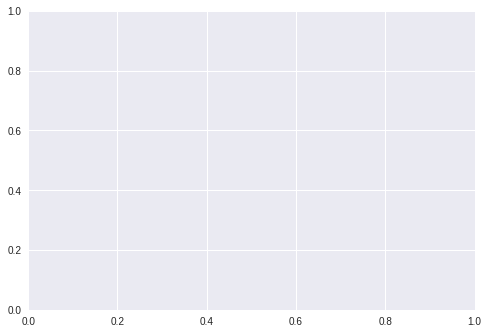

In [73]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

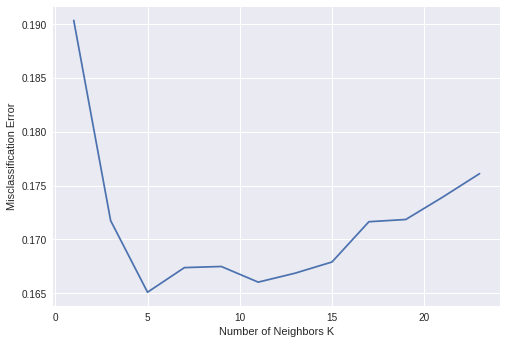

In [74]:
# plot misclassification error vs k
plt.plot(myList, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [75]:
knn = KNeighborsClassifier(n_neighbors=5)

    # fitting the model
knn.fit(X_train, y_train)

    # predict the response
pred = knn.predict(X_test)

    # evaluate accuracy
print (accuracy_score(y_test, pred))

0.825291181364


In [53]:
from sklearn.neighbors import NearestNeighbors

format_type = [s for s in list(animetable) if "type_" in s]
attributes = pd.concat([animetable[genre],animetable[format_type],animetable[["members"]],animetable[["rating"]],
                        animetable["episodes"]],axis=1)

#nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(attributes)
#distances, indices = nbrs.kneighbors(attributes)
#distance_total = 

In [54]:
from sklearn.neighbors import BallTree

tree = BallTree(attributes, leaf_size=2)              
dist, ind = tree.query([attributes.iloc[0]], k=4)
print(ind.flatten())  # indices of 3 closest neighbors
for i in ind.flatten():
    print(animetable.iloc[i]['name'])

[   0  406 1708  270]
name    Kimi no Na wa.
name    Kimi no Na wa.
Name: 0, dtype: object
name    Ore Monogatari!!
name    Ore Monogatari!!
Name: 406, dtype: object
name    Hentai Ouji to Warawanai Neko.
name    Hentai Ouji to Warawanai Neko.
Name: 1708, dtype: object
name    ReLIFE
name    ReLIFE
Name: 270, dtype: object


In [236]:
animetable.head()

,anime_id,name,type,episodes,rating,members,genreCount,Action,Adventure,Cars,...,Thriller,Vampire,Yaoi,Yuri,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,32281,Kimi no Na wa.,Movie,1,9.37,200630,4,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,9.26,793665,7,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2,28977,Gintama°,TV,51,9.25,114262,7,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,9253,Steins;Gate,TV,24,9.17,673572,2,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,9969,Gintama&#039;,TV,51,9.16,151266,7,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [238]:
len(list(animetable))

105

In [239]:
animetable[animetable.index.duplicated()]



,anime_id,name,type,episodes,rating,members,genreCount,Action,Adventure,Cars,...,Thriller,Vampire,Yaoi,Yuri,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
